<center><span style="font-size:25px;">АНАЛИЗ РЕЗЮМЕ HeadHunter</span></center>

<center> <img src='data/pics/hh_label.jpg' alt="drawing" style="width:600px;" />

Это мой первый проект. Думаю, тут всё понятно из названия.

<h2 id='contents'>Оглавляшка:</h2>

* [Загружаемые библиотеки](#libs)
* [Исследование структуры данных](#loaddescribeetc) чтение, .head, .info, .describe

<font size=4>Преобразование данных</font>

* [Признак "Образование и ВУЗ"](#firstft)
* [Признак "Пол, возраст"](#secondft)
* [Признак "Опыт работы"](#thirdft)
* [Признак "Город, переезд, командировки"](#fourthft)
* [Признаки "Занятость" и "График"](#fifthft)
* [Признак "Заработная плата"](#sixthft)

<font size=4>Исследование зависимостей в данных</font>

* [Распределение признака "Возраст"](#agedistrib)
* [Распределение признака "Опыт работы"](#workstagedistrib)
* [Распределение признака "Заработная плата"](#salarydistrib)
* [Диаграмма зависимости признаков "Заработная плата" и "Образование"](#saledudeps)
* [Диаграмма зависимости признаков "Заработная плата" и "Город"](#saltowndeps)
* [Диаграмма зависимости признаков "Заработная плата", "Готовность к переезду" и "Готовность к командировкам"](#salreadinesstodeps)
* [Тепловая карта зависимости признаков "Заработная плата", "Возраст" и "Образование"](#salageedudeps)
* [Диаграмма рассеяния зависимости признаков "Опыт работы" и "Возраст"](#agestagedeps)
* [Диаграмма о готовности человека к чему-либо](#additionalone)
* [Диаграмма ожидаемой заработной платы по должностям](#additionaltwo)

<font size=4>Очистка данных</font>

* [Удаление дублей и работа с пропусками](#dublicsvsnans)
* [Удаление выбросов вручную](#outliersbyhands)
* [Удаление выбросов по методу Z-отклонений](#outlierszdeviation)


## Загружаемые библиотеки <a id='libs' />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
import gdown

# Оставлю тут отображение всей строки, полезная вещь, когда ковыряешься в данных вручную.
#pd.set_option('display.max_colwidth', None)

## Исследование структуры данных <a id='loaddescribeetc' />

Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [ ]:
file = '16iVcMT1vZJ7NNSAijeOTeNw5qES5GDpA'
gdown.download(f"https://drive.google.com/uc?id={file}", "data/hh_data.csv", quiet=False)

hh_data = pd.read_csv('data/hh_data.csv', sep=';')

Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
display(hh_data.head(2), hh_data.tail(2))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [5]:
display(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

Обратите внимание на информацию о числе непустых значений.

In [6]:
# Я напишу так, т.к. на задание 2.4 проще ответить через так:
display(hh_data.isna().sum()[hh_data.isna().sum() > 0])

Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64

Выведите основную статистическую информацию о столбцах.


In [7]:
display(hh_data.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


## Преобразование данных

[↑ contents](#contents)

<h3 id='firstft'>Признак "Образование и ВУЗ"</h3>

Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
# Добавлю условие, чтобы ячейку можно было выполнить повторно.
if 'Образование и ВУЗ' in hh_data.columns:
    
    # Прошу прощения за столь сложное преобразование, но мне интересно было написать именно так.
    # Я понимаю, что подобный код сложно прочесть и лучше писать простыми функциями, но... блин... Хочу.)))
    
    # Слева направо: делим строку сплитом, выделяем первые 2 [:2] слова из списка, обрезаем слово 'образование'
    # лямбдой, там же производим склейку и всё это приводим к нижнему регистру .lower. Добавляем везде str
    # иначе будет ошибка. Типа переводим в строку. Перед каждым изменением можно поставить # и посмотреть, что будет.
    hh_data['Образование и ВУЗ'] = hh_data['Образование и ВУЗ'].str.split().str[:2].apply(lambda x: x[0] if x[1] == 'образование' else ' '.join(x)).str.lower()
    
    # Не хочу добавлять столбец и дропать старый, просто переименую
    hh_data = hh_data.rename(columns={'Образование и ВУЗ': 'Образование'})

    # Не знаю зачем, но приведу к типу категорий. Вдруг пригодится.
    hh_data['Образование'] = hh_data['Образование'].astype('category')

# value_counts - рулит.)
print(hh_data['Образование'].value_counts())

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64


[↑ contents](#contents)

<h3 id='secondft'>Признак "Пол, возраст"</h3>

Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [9]:
# Здесь тоже условие, чтобы ячейка могла исполняться несколько раз.
if 'Пол, возраст' in hh_data.columns:
    
    # Сделаю 2 объекта Series, в которые сохраню возраст и дату рождения на всякий случай.
    series_age = hh_data['Пол, возраст'].str.split(',').str[1].str.split().str[0].astype(int)
    series_date_of_birth = hh_data['Пол, возраст'].str.split(',').str[2]
    
    # С вашего позволения добавлю столбец возраста не в конец таблицы, а на второе место.
    hh_data.insert(1, 'Возраст', series_age)
        
    # Здесь типичное преобразование в М-э и Ж-о и переименование столбца 'Пол, возраст', чтоб его не дропать.
    # Отмечу применение метода .strip(), чтобы обрезать лишние пробелы. Иначе везде будет Ж.
    hh_data['Пол, возраст'] = hh_data['Пол, возраст'].str.split(',').str[0].apply(lambda x: 'М' if x.strip() == 'Мужчина' else 'Ж').astype('category')
    hh_data = hh_data.rename(columns={'Пол, возраст': 'Пол'})
    
# Ах, да, я привёл столбец 'возраст' к типу int и столбец 'пол' к категориальному типу.. Хз зачем. Потому что могу.
print(f"% женских резюме = {(((hh_data['Пол'] == 'Ж').sum()/hh_data['Пол'].count())*100).round(2)}%")
print(f"Средний возраст соискателей = {hh_data['Возраст'].mean().round(2)}")

print(f"% женских резюме, вариант кода 2 = {((hh_data['Пол'] == 'Ж').value_counts(normalize=True)[1]*100).round(2)}%", '\n')

% женских резюме = 19.07%
Средний возраст соискателей = 32.2
% женских резюме, вариант кода 2 = 19.07% 



[↑ contents](#contents)

<h3 id='thirdft'>Признак "Опыт работы"</h3>

Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [10]:
# Прошу прощения за лишнюю ячейку, но тут я решил сделать копию, чтобы была возможность для тестов ячейки ниже.
# Переменные копий буду называть по принципу stage - point. В данном ipynb файле 4 параграфа (stage) и т.д.
# Шоб не грузить с самого начала всё. Долго. Дальше будет тоже по 1 доп ячейке, если понадобится.
hh_data_copy_s2_p3 = hh_data.copy()

In [11]:
# Фух, это было не просто и мне понадобился модуль re, не помню, был ли он в курсе, но он очень удобный.
import re

# Очередное условие для ревоспроизведения ячейки.
if 'Опыт работы' in hh_data.columns:
    
    # Здесь мне было проще реплэйснуть "неугодные" строки на NaN.
    hh_data['Опыт работы'] = hh_data['Опыт работы'].replace('Не указано', np.nan)
    
    # Здесь я привёл строки к вменяемому виду: N лет/года/год + N месяцев/месяца/месяц. Типа 3 года 3 месяца.
    # Отмечу особенность, что findall сначала должны идти слова с окончаниями, а потом без.
    # Ну и отмечу отсев необходимых слов через индекс. [0:6]
    hh_data['Опыт работы'] = hh_data['Опыт работы'].apply(lambda x: ' '.join(re.findall(r'\d+ (?:года|год|лет|месяцев|месяца|месяц)', ' '.join(x.split()[:6]))) if pd.notna(x) else x)
    
    # Здесь происходит вычисление месяцев. Я сначала думал пихнуть всё в одну лямбду, но у меня не получилось.( 
    # Ну и всё просто: 'год*12 + месяц' если длина строки > 10 или 'год*12' если <, или просто месяц. 
    # И всё это если не NaN. Почему 10? Потому что в 1 смысловой цепочке максимум может быть 10 символов: '12 месяцев'.
    hh_data['Опыт работы'] = hh_data['Опыт работы'].apply(lambda x: (int(x.split()[0])*12 + int(x.split()[2]) if re.findall(r'\d+ (?:года|год|лет)', x) and len(x) > 10 
                                                                     else int(x.split()[0])*12 if re.findall(r'\d+ (?:года|год|лет)', x) and len(x) <= 10 
                                                                     else int(x.split()[0])) if pd.notna(x) else x)
    
    # Ну и моё традиционное переименование.. Не люблю я дропать почему-то.. Хз почему. Мб я не прав.
    hh_data = hh_data.rename(columns={'Опыт работы': 'Опыт работы (месяц)'})

# Так, здесь я оставлю функцию из курса, слегка изменённую. Которая приводит к такому же результату:
# Чисто для себя оставляю. Прошу прощения за громоздкость.

def get_experience(arg):
    
    # Преобразование в NaN, если "Не указано"
    if arg == 'Не указано':
        return np.nan
    
    # Если не NaN - проводим манипуляции с вычислениями месяцев. Иначе возвращаем NaN.
    if pd.notna(arg):    
        month_key_words = ['месяц', 'месяцев', 'месяца']
        year_key_words = ['год', 'лет', 'года']
        args_splited = arg.split()[:6] # Здесь так же отмечу обрезку строки через индекс.
        month = 0
        year = 0
        for i in range(len(args_splited)):
            
            if args_splited[i] in month_key_words:
                month = args_splited[i-1]
            if args_splited[i] in year_key_words:
                year = args_splited[i-1]
        return int(year)*12 + int(month)
    else:
        return arg

hh_data_copy_s2_p3['Опыт работы (месяц)'] = hh_data_copy_s2_p3['Опыт работы'].apply(get_experience)

print(f"Количество элементов NaN в основной таблице: {hh_data['Опыт работы (месяц)'].isna().sum()}")
print(f"Количество элементов NaN в дублирующей таблице: {hh_data_copy_s2_p3['Опыт работы (месяц)'].isna().sum()}", '\n')
print('Здесь я проверяю равенство значений в таблицах, которые не NaN.', '\n', 'Можно увидеть, что количество False = 170, т.к. NaN != NaN.', '\n', 'А элементов NaN в таблицах - 170. Значит я нигде не ошибся.')
print((hh_data['Опыт работы (месяц)'] == hh_data_copy_s2_p3['Опыт работы (месяц)']).value_counts(), '\n')

# Я короче упоролся и всё таки написал преобразование в 1 строку кода. Закомменчу её, оставлю себе на память.))
# Ну да, около 30 секунд ожидание...( Можно раскомментить, запустить.

#hh_data_copy_s2_p3['Опыт работы'].apply(lambda x: (int(x.split()[2])*12 + int(x.split()[4]) if re.findall(r'\d+ (?:года|год|лет)', ' '.join(x.split()[:6])) and len((' '.join(re.findall(r'\d+ (?:года|год|лет|месяцев|месяца|месяц)', ' '.join(x.split()[:6])))).strip()) > 10 
#                                                   else int(x.split()[2])*12 if re.findall(r'\d+ (?:года|год|лет)', ' '.join(x.split()[:6])) and len((' '.join(re.findall(r'\d+ (?:года|год|лет|месяцев|месяца|месяц)', ' '.join(x.split()[:6])))).strip()) <= 10 
#                                                   else int(x.split()[2]) if re.findall(r'\d+ (?:месяцев|месяца|месяц)', ' '.join(x.split()[:6])) else 0) if pd.notna(x) else x)

# Ну и ответ на задачку:
print(f"Медианный опыт работы в месяцах = {int(hh_data['Опыт работы (месяц)'].median())} мес.")

Количество элементов NaN в основной таблице: 170
Количество элементов NaN в дублирующей таблице: 170 

Здесь я проверяю равенство значений в таблицах, которые не NaN. 
 Можно увидеть, что количество False = 170, т.к. NaN != NaN. 
 А элементов NaN в таблицах - 170. Значит я нигде не ошибся.
Опыт работы (месяц)
True     44574
False      170
Name: count, dtype: int64 

Медианный опыт работы в месяцах = 100 мес.


---

[↑ contents](#contents)

<h3 id='fourthft'>Признак "Город, переезд, командировки"</h3>

Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [12]:
def round_bracket_eraser(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    moscow_stpeter = ['Москва', 'москва', 'Санкт-Петербург', 'Санкт Петербург', 'СанктПетербург']
    
    # Убираем метро
    arg = [i for i in arg.split(',') if 'м.' not in i]
    
    # Разделю список на 3 элемента, которые нам необходимы: первый, последний и то, что останется в середине.
    first_elem = arg.pop(0)
    last_elem = arg.pop(-1)
    
    arg = ','.join([i for i in arg])
    
    # Преобразование первого элемента. 
    # Тут на самом деле не универсальное. Потому что, я так и не нашёл способ извлечения города,
    # если человек пропускает "(" или что-то где-то упускает открывающуюся скобку. 
    # Абстрактный пример: 'Название города (2 элемента через пробел) Воронежская область)'
    # В таком случае код засчитает однокоренное слово и скажет, что человек из Воронежа.
    # Если вы знаете (тот, кто это читает) более универсальный способ - напишите мне его пожалуйста.
    # Потому что если не проводить проверку на скобки, данные будут не корректные из-за однокоренных слов.
    if '(' in first_elem:
        
        # Здесь я добавляю не существующий в строке символ перед "(", чтоб по нему разбить строку.
        adding_separator_in_first_elem = ''.join([';' + i if i == '(' else i for i in first_elem])
        # И забираю оттуда первый элемент, разбив её по символу, который добавил.
        first_elem = adding_separator_in_first_elem.split(';')[0]
    
    # Я не смог реализовать эту строчку кода через классический цикл фор. Гпт не помог.(
    # Там прикольно. Создаётся список из элементов "другие" и искомого названия города, если есть.
    # Тут важно!! Если назвать элемент не "другие", а английским названием, типа "other", то список нужно 
    # будет сортировать в обратном порядке: reverse=True, т.к. программа дискриминирует кириллицу и сначала сортирует по англ буквам.
    # И наконец извлекается 0 элемент, который является городом.
    first_elem = sorted(list(i if i in first_elem else 'другие' for i in million_cities + moscow_stpeter), reverse=False)[0]
    first_elem = 'город-миллионник' if first_elem in million_cities else first_elem
    # После этих 2х строк в столбце останутся только Мск, Питер, город-миллионник и other.
    # Конец блока первого элемента.
    
    # Преобразование последнего элемента
    # Тут всё просто. Скобок в этом элементе не наблюдалось, но можно дополнить код, если что.
    # Отмечу сравнивание по слову "командир", т.к. там была такая строка. Были упущены части слова.
    # Ах да, там были строки, в которых было пропущено указание отношения к командировкам и по условиям это "не".
    last_elem = 'не' if 'командир' not in last_elem else last_elem
    last_elem = False if 'не' in last_elem else True
    
    # Преобразование второго элемента
    # Здесь второе условие про ")", т.к. там были такие моменты, когда в первом элементе был указан
    # перечень городов в скобках зачем-то. И при обрезке остались хвосты.
    if '(' in arg:
        # Тут, как в случае с первым элементом. Только тут я не беру необходимое по индексу, 
        # а выбираю его, если в нём нет скобок.
        # Согласен, если скобок вообще нет, то нужно добавлять список с перечнем готовности
        # и отсеивать по нему.
        adding_separator_in_last_elem_1 = ''.join([';' + i if i == '(' else i for i in arg])
        arg = ''.join([i for i in adding_separator_in_last_elem_1.split(';') if '(' not in i]).replace(',', '')
    # Со второй скобкой то же самое, только несуществующий символ добавляется после.
    if ')' in arg:
        adding_separator_in_last_elem_2 = ''.join([i + ';' if i == ')' else i for i in arg])
        arg = ''.join([i for i in adding_separator_in_last_elem_2.split(';') if ')' not in i]).replace(',', '')
    
    # Зачем-то стрипую.)) хз
    arg = arg.strip()
    arg = False if 'не' in arg else True
    
    final_list = [first_elem, arg, last_elem]
    return final_list
# Прошу прощения за такое изобилие комментов, но я просидел над этой функцией слишком долго. 
# Чисто для себя всё пишу.
# P.s. не стал морочиться с модулем re, т.к. пока не понимаю его.

if 'Город, переезд, командировки' in hh_data.columns:
    # У меня короче проблема. Не люблю дропать. Хз почему.
    hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(round_bracket_eraser).str[1]
    hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(round_bracket_eraser).str[2]
    hh_data['Город, переезд, командировки'] = hh_data['Город, переезд, командировки'].apply(round_bracket_eraser).str[0]
    hh_data = hh_data.rename(columns={'Город, переезд, командировки': 'Город'})

# Питерские товарищи:
spb_guys_s2_p4 = hh_data['Город'] == 'Санкт-Петербург'
# Количество готовых и к командировкам, и к переезду:
who_ready_4_all_s2_p4 = hh_data['Готовность к командировкам'] & hh_data['Готовность к переезду']

print(f"В Питере живёт {int((spb_guys_s2_p4.value_counts(normalize=True)[1]*100).round())}% соискателей.")
print(f"{int((who_ready_4_all_s2_p4.value_counts(normalize=True)[1]*100).round())}% соискателей готовы на всё.)")

В Питере живёт 11% соискателей.
32% соискателей готовы на всё.)


[↑ contents](#contents)

<h3 id='fifthft'>Признаки "Занятость" и "График"</h3>

Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже: <br />

<img src='data\pics\ohe.jpg' width='auto' />

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [12]:
#hh_data_copy_s2_p5 = hh_data.copy()

In [13]:
# Здесь попроще, но не менее ценный способ формирования списка уникальных элементов из столбца.
def sorting_work_shedule(df, columns):
    for col in columns:
        # Вот он:
        list_of_unique_items_in_col = list(set(df[col].apply(lambda x: x.split(',')).explode().str.strip()))
        # И дальше проверка. Удобно всё, конечно.. 
        for i in list_of_unique_items_in_col:
            df[i] = df[col].str.contains(i)
    return df

# Добавил условие для ревоспроизводимости ячейки. Потому что там дроп.
if 'График' in hh_data.columns:
    hh_data = sorting_work_shedule(hh_data, ['График', 'Занятость'])
    hh_data = hh_data.drop(columns=['График', 'Занятость'])

print(f"{(hh_data['проектная работа'] & hh_data['волонтерство']).sum()} человек ищут проектную работу или волонтёрство.")
print(f"{(hh_data['вахтовый метод'] & hh_data['гибкий график']).sum()} человек хотят работать вахтовым методом с гибким графиком.")

436 человек ищут проектную работу или волонтёрство.
2311 человек хотят работать вахтовым методом с гибким графиком.


[↑ contents](#contents)

<h3 id='sixthft'>Признак "Заработная плата"</h3>

Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, [MDF.RU](https://mfd.ru/export/#Alias=false&Period=1&timeframeValue=1&timeframeDatePart=day&StartDate=04.10.2021&EndDate=04.10.2021&SaveFormat=0&SaveMode=0&FieldSeparator=%253b&DecimalSeparator=.&DateFormat=yyyyMMdd&TimeFormat=HHmmss&AddHeader=true&RecordFormat=0&Fill=false), данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src='data\pics\table.jpg' />


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [15]:
#hh_data_copy_s2_p6 = hh_data.copy()

In [ ]:
# Подгружу таблицу обменом валют из задания курса:
exchange_rates = pd.read_csv('data/ExchangeRates.csv')

# Преобразую столбец с датой в дэйттайм. В столбце указана только дата, без времени.
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], format='%d/%m/%y')

# Ниже произодятся последовательные операции с столбцом ЗП, с последующим его исключением потому добавлю условие.
if 'ЗП' in hh_data.columns:
    # Преобразую столбец "обновление резюме" в дэйттайм. Очень интересное извлечение даты и сохранение datetime.
    hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], format='%d.%m.%Y %H:%M', errors='coerce').dt.floor('D')

    # Этот блок из 6-ти комментов я сохраню для себя, т.к. не запомню, а код - полезный.
    # Да, чтоб сработало, надо раскомментить и всё это дело с самого начала запустить. Единственный минус.
    # Чтобы посмотреть, какие вообще в столбце указаны валюты, можно использовать следующую строку кода:
    # print(hh_data['ЗП'].str.extract('([a-zA-Zа-яА-Я.]+)').value_counts())
    # Чтобы сформировать список из уникальных слов столбца - следующий код:
    # print(list(set(hh_data['ЗП'].str.extract('([a-zA-Zа-яА-Я.]+)').iloc[:, 0].str.strip())))

    # Т.к. в столбце 'ЗП' есть отличия в названиях валют - исправлю это, через словарь. Так мне показалось проще.
    currency_dict = {'бел.руб.': 'BYN', 'грн.': 'UAH', 'сум': 'UZS'} # Словарь можно расширить.
    # З.Ы. нужно уделять внимание точкам в словаре, чтоб они соответствовали точкам в столбце. 
    # И тут regex=True. 
    hh_data['ЗП'] = hh_data['ЗП'].replace(currency_dict, regex=True)
    
    # Выделю названия валют из зарплаты в отдельный столбец.
    hh_data['ЗП_letters'] = hh_data['ЗП'].str.extract('([a-zA-Zа-яА-Я.]+)').astype(str)
    
    # Объединю таблицы по условиям: дата - дата, названия валют - названия валют.
    hh_data = hh_data.merge(exchange_rates, left_on=['Обновление резюме', 'ЗП_letters'], right_on=['date', 'currency'], how='left')
    
    # Добавлю новый, он же итоговый столбец в необходимое мне место таблицы, выделив только цифры.
    hh_data.insert(2, 'ЗП (руб)', hh_data['ЗП'].apply(lambda x: int(re.sub(r'[^\d]', '', x))))
    
    # Произведу вычисления по конвертации валют.
    # ~ - оператор отрицания. Тобиш .str.contains("руб") нам бы вывел только те строки, которые содержат "руб".
    # Но нам же надо "не руб", т.к. нам намержило только в "не руб", а остальное NaN, надо ж как-то выбрать "не руб".
    # до .fillna(1) я не додумался.(
    # Потому .loc + маска строк без "руб" + столбец и пошло, поехало... зп * (курс / пропорцию), как в задании.
    not_rub_rows_mask = ~hh_data['ЗП'].str.contains('руб')
    hh_data.loc[not_rub_rows_mask, 'ЗП (руб)'] = hh_data.loc[not_rub_rows_mask, 'ЗП (руб)'] * (hh_data.loc[not_rub_rows_mask, 'close'] / hh_data.loc[not_rub_rows_mask, 'proportion'])
    
    # Дропну лишнее.
    hh_data = hh_data.drop(columns=['ЗП', 'ЗП_letters', 'currency', 'per', 'date', 'time', 'close', 'vol', 'proportion'])

# Отвечу на вопрос курса:
print(f'Желаемая медианная зарплата соискателей в нашей таблице (в рублях) равна: {round(hh_data["ЗП (руб)"].median()/1000)} тыс. руб.')
print('Кайф')

#hh_data.info() - сходится. Я там только категориальных типов наделал зачем-то и дэйттайм оставил. Не думаю, что это плохо.

Желаемая медианная зарплата соискателей в нашей таблице (в рублях) равна: 59 тыс. руб.
Кайф


# Исследование зависимостей в данных

Так, напишу сразу. Я не знаю на сколько правдоподобна наша с вами таблица.  
Т.к. это обучение и вполне понятен уровень абстракции.  
Я высказываю свою точку зрения, как будто так оно и есть. С долей юмора. Не судите строго.

[↑ contents](#contents)

<h3 id='agedistrib'>Распределение признака "Возраст"</h3>

Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?

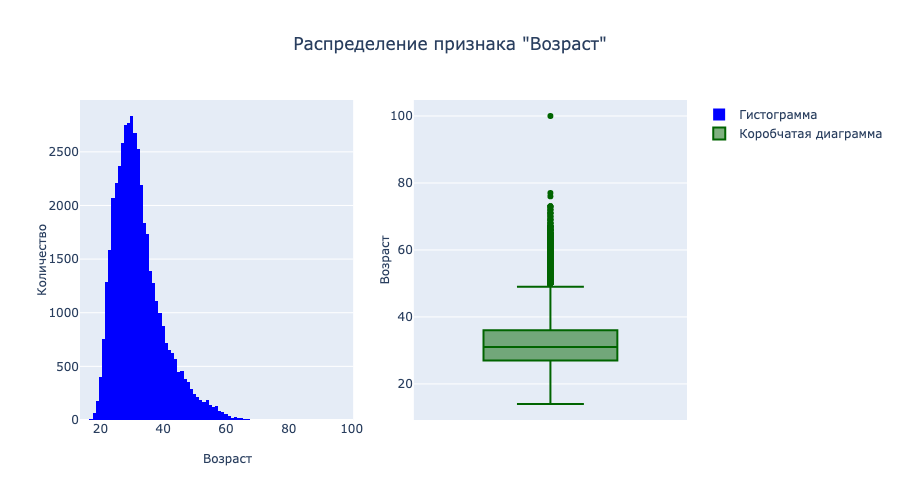

Модальное значение возраста соискателей = 30 возрастных единиц.))


In [15]:
# Полотно.
fig_s3_p1 = sp.make_subplots(rows=1, cols=2, shared_yaxes=False)

# Гистограмма.
trace1_s3_p1 = go.Histogram(x=hh_data['Возраст'], 
                            name='Гистограмма', 
                            hoverinfo='x+y', 
                            marker=dict(color='blue'))
fig_s3_p1.add_trace(trace1_s3_p1, row=1, col=1)

# Коробка.
trace2_s3_p1 = go.Box(y=hh_data['Возраст'], 
                      name='Коробчатая диаграмма', 
                      hoverinfo='y', 
                      orientation='v', 
                      marker=dict(color='darkgreen'))
fig_s3_p1.add_trace(trace2_s3_p1, row=1, col=2)

# Название полотна, с центрированием.
fig_s3_p1.update_layout(title_text='Распределение признака "Возраст"', title_x=0.5, width=900, height=500)

# Оставлю эти 2 строчки. Часа полтора искал, как убрать название из под графика, но оставить его в легенде.
#fig_s3_p1.update_xaxes(showticklabels=False)
#fig_s3_p1.update_yaxes(showticklabels=False)

fig_s3_p1.update_xaxes(showticklabels=False, row=1, col=2)

# Добавлю аннотации (текст) для каждого графика
fig_s3_p1.add_annotation(text='Возраст',
                         x=0.20,  # X-координата для первого графика
                         y=-0.15,  # Y-координата для первого графика (ниже графика)
                         xref='paper',  # Относительно бумаги (графика)
                         yref='paper',
                         showarrow=False)  # Без стрелки

fig_s3_p1.add_annotation(text='Возраст',
                         x=0.5,  # X-координата для второго графика
                         y=0.5,  # Y-координата для второго графика
                         xref='paper',
                         yref='paper',
                         textangle=-90,
                         showarrow=False)

fig_s3_p1.add_annotation(text='Количество',
                         x=-0.08,  # X-координата для левой аннотации
                         y=0.5,  # Y-координата для левой аннотации
                         xref='paper',
                         yref='paper',
                         textangle=-90,  # Угол текста
                         showarrow=False)

# fig_s3_p1.show()
fig_s3_p1.show('png') # <- для гитхаба

print(f"Модальное значение возраста соискателей = {hh_data['Возраст'].mode()[0]} возрастных единиц.))")

Каковы предельные значения признака?  
> Если исходить из верхней и нижней границы коробки, то нижняя граница или минимальное значение - это 14 лет, а верхняя граница - 49 лет. Но у нас есть и потенциальный выброс: 100 лет. Окей, может там чёткий дед решил еще пожить и поработать, вообще не стрессуя, сидя у себя на крыльце.. Но скорее всего кто-то скрывает свой возраст.)  


Далее, в каком примерном интервале находится возраст большинства соискателей?  
> Коробка нам говорит о том, что это 27-36 лет. Но по гистограмме я бы сказал 23-35. Но я тот ещё аналитик.. Начинающий.  


Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?  
> Сотка - аномалия. Там вон в коробке ещё куча точек. И на гистограмме, если приблизить, куча 60+ тел.
> Но так же отмечу нижнюю границу в 14 лет и близлежащие 15-17.

[↑ contents](#contents)

<h3 id='workstagedistrib'>Распределение признака "Опыт работы"</h3>

Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?

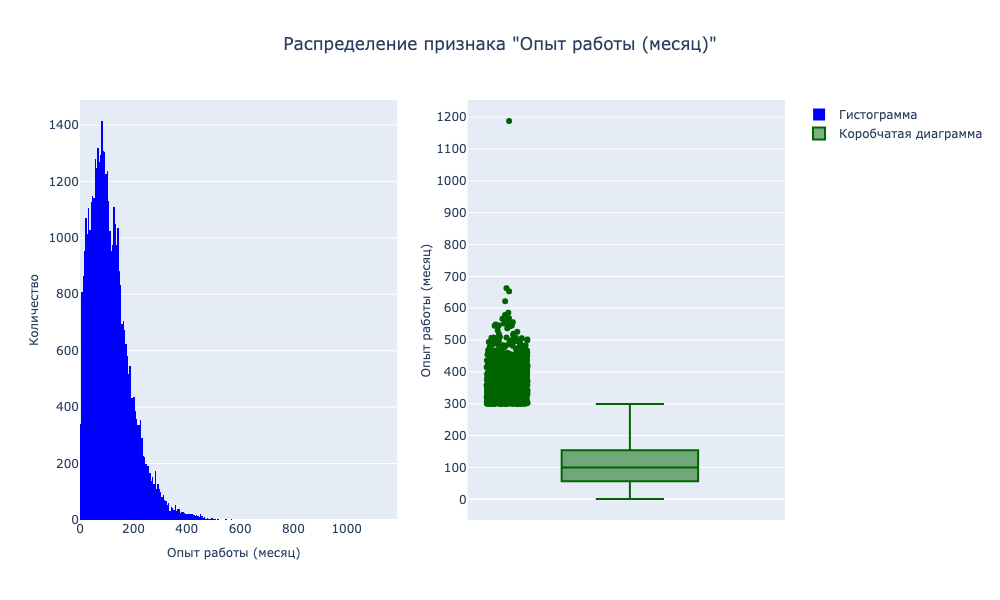

Максимальный опыт работы в месяцах = 1188 месяцев. Или 99 лет.
Мода распределения = 81 месяц.


In [16]:
# Полотно.
fig_s3_p2 = sp.make_subplots(rows=1, cols=2, shared_yaxes=False)

# Гистограмма.
trace1_s3_p2 = go.Histogram(x=hh_data['Опыт работы (месяц)'], 
                            name='Гистограмма', 
                            hoverinfo='x+y', 
                            marker=dict(color='blue'))
fig_s3_p2.add_trace(trace1_s3_p2, row=1, col=1)

# Коробка. Добавил, чтоб выбросы отображались сбоку, хз зачем.
trace2_s3_p2 = go.Box(y=hh_data['Опыт работы (месяц)'], 
                      name='Коробчатая диаграмма', 
                      hoverinfo='y', 
                      orientation='v', 
                      marker=dict(color='darkgreen'),
                      boxpoints='outliers',
                      jitter=0.3,
                      pointpos=-1.8)
fig_s3_p2.add_trace(trace2_s3_p2, row=1, col=2)

# Название полотна.
fig_s3_p2.update_layout(title_text='Распределение признака "Опыт работы (месяц)"', title_x=0.5, width=900, height=500)

# Чтоб не показывало название коробки, а то бесило.)
fig_s3_p2.update_xaxes(showticklabels=False, row=1, col=2)

# Добавлю аннотации (текст) для каждого графика
fig_s3_p2.add_annotation(text='Опыт работы (месяц)',
                         x=0.12,  # X-координата для первого графика
                         y=-0.1,  # Y-координата для первого графика (ниже графика)
                         xref='paper',  # Относительно бумаги (графика)
                         yref='paper',
                         showarrow=False)  # Без стрелки

fig_s3_p2.add_annotation(text='Опыт работы (месяц)',
                         x=0.49,  # X-координата для второго графика
                         y=0.5,  # Y-координата для второго графика
                         xref='paper',
                         yref='paper',
                         textangle=-90,
                         showarrow=False)

fig_s3_p2.add_annotation(text='Количество',
                         x=-0.08,  # X-координата для левой аннотации
                         y=0.5,  # Y-координата для левой аннотации
                         xref='paper',
                         yref='paper',
                         textangle=-90,  # Угол текста
                         showarrow=False)

# Здесь добавил изменение размера и изменил количество точек на осях.
fig_s3_p2.update_layout(yaxis2=dict(dtick=100), # Для коробки.
                        xaxis = dict(dtick=200), # Для гистограммы.
                        width=1000,
                        height=600)

#fig_s3_p2.show()
fig_s3_p2.show('png')

print(f"Максимальный опыт работы в месяцах = {int(hh_data['Опыт работы (месяц)'].max())} месяцев. Или {int(hh_data['Опыт работы (месяц)'].max()/12)} лет.")
print(f"Мода распределения = {int(hh_data['Опыт работы (месяц)'].mode()[0])} месяц.")

Каковы предельные значения признака?  
> Тут опять же, если исходить из верхней и нижней границы коробки, то это 1 и 299. Но есть и потенциальный выброс в количестве 1188.. Почему нет? Вполне возможен тот факт, что человек 99 лет работал человеком. Да, без оплаты, да, порой даже без спасибо, но - это тоже своего рода работа. И далеко не каждый за неё берётся.   


В каком примерном интервале находится опыт работы большинства соискателей?  
> Коробка нам говорит о том, что это 57-154 месяца. А по гистограмме я бы сказал 10-160/170 месяцев. Но опять же, я всё ещё начинающий аналитик.


Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?  
> 1180 - явная аномалия. Но помимо этого есть и иные цифры: 400, 500, 600. А это 33 года, 40 лет, 50 лет стажа... Да, такое вполне возможно. Вон, моя бабка, больше 30 лет проработала в техникуме вахтёршей-садовником.. Гордилась этим. И учитывая тот факт, что пенсионный возраст у нас в стране периоически повышают, то стаж в 50 лет однажды станет нормой. И человеку необходимо будет искать работу в 70.)) Как бы это печально не звучало.

[↑ contents](#contents)

<h3 id='salarydistrib'>Распределение признака "Заработная плата"</h3>

Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака заработной платы? Обратите внимание на гигантские размеры желаемой заработной платы.


In [17]:
# Здесь снова копия, т.к. есть преобразование таблицы.
hh_data_copy_s3_p3 = hh_data.copy()

# Преобразование таблицы. Оставлю только те данные, которые меньше ляма.
# option context для того, чтоб не было 1e+10.
hh_data_copy_s3_p3 = hh_data_copy_s3_p3[hh_data_copy_s3_p3['ЗП (руб)'] < 1000000]
with pd.option_context('display.float_format', '{:.3f}'.format):
    display(hh_data_copy_s3_p3['ЗП (руб)'].describe())

count    44738.000
mean     75644.566
std      60522.799
min          1.000
25%      37000.000
50%      59000.000
75%      95000.000
max     923983.000
Name: ЗП (руб), dtype: float64

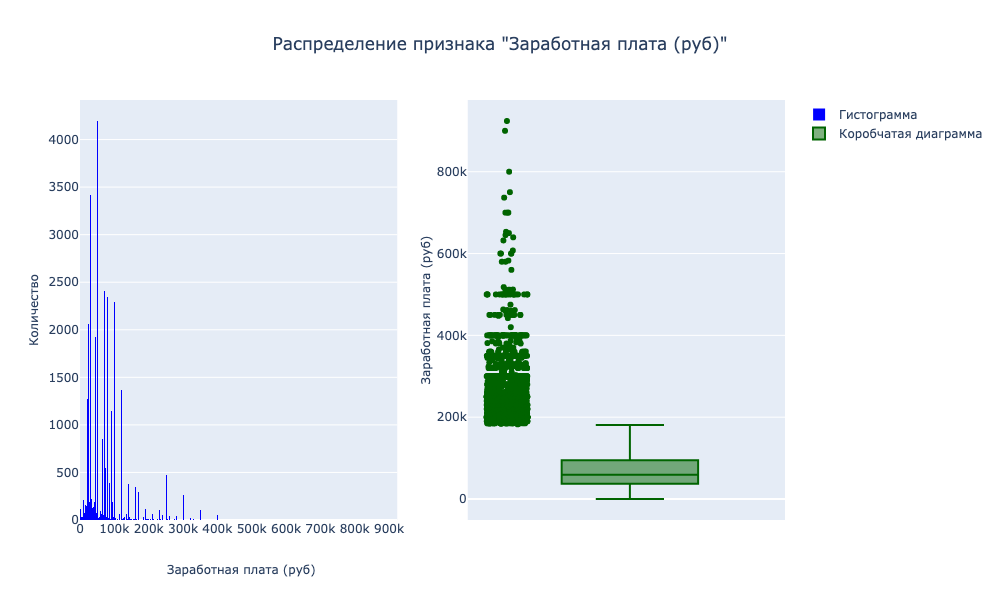

Количество соискателей, требующих зарплату больше ляма в месяц = 5 человек.


In [18]:
# И снова полотно.
fig_s3_p3 = sp.make_subplots(rows=1, cols=2, shared_yaxes=False)

# Гистограмма.   
trace1_s3_p3 = go.Histogram(x=hh_data_copy_s3_p3['ЗП (руб)'], 
                            name='Гистограмма', 
                            hoverinfo='x+y', 
                            marker=dict(color='blue'))
fig_s3_p3.add_trace(trace1_s3_p3, row=1, col=1)

# Коробка. Оставлю выбросы в таком виде. Хз зачем.
trace2_s3_p3 = go.Box(y=hh_data_copy_s3_p3['ЗП (руб)'], 
                      name='Коробчатая диаграмма', 
                      hoverinfo='y', 
                      orientation='v', 
                      marker=dict(color='darkgreen'),
                      boxpoints='outliers',
                      jitter=0.3,
                      pointpos=-1.8)
fig_s3_p3.add_trace(trace2_s3_p3, row=1, col=2)

# Название полотна.
fig_s3_p3.update_layout(title_text='Распределение признака "Заработная плата (руб)"', title_x=0.5, width=900, height=500)

# Минус название коробки.
fig_s3_p3.update_xaxes(showticklabels=False, row=1, col=2)

# Добавлю аннотации (текст) для каждого графика
fig_s3_p3.add_annotation(text='Заработная плата (руб)',
                         x=0.12,  # X-координата для первого графика
                         y=-0.14,  # Y-координата для первого графика (ниже графика)
                         xref='paper',  # Относительно бумаги (графика)
                         yref='paper',
                         showarrow=False)  # Без стрелки

fig_s3_p3.add_annotation(text='Заработная плата (руб)',
                         x=0.49,  # X-координата для второго графика
                         y=0.5,  # Y-координата для второго графика
                         xref='paper',
                         yref='paper',
                         textangle=-90,
                         showarrow=False)

fig_s3_p3.add_annotation(text='Количество',
                         x=-0.08,  # X-координата для левой аннотации
                         y=0.5,  # Y-координата для левой аннотации
                         xref='paper',
                         yref='paper',
                         textangle=-90,  # Угол текста
                         showarrow=False)

# Здесь высота, ширина и чтоб было больше этих.. точек на оси.
fig_s3_p3.update_layout(width=1000,
                        height=600,
                        xaxis=dict(dtick=100000)) # с dtick-ом нужно быть внимательнее, а то всё повиснет нахрен.

# Отображение цифр на осях, чтоб было 200к, 500к и т.д.
fig_s3_p3.update_xaxes(tickformat=',.0s', exponentformat='none', row=1, col=1)
fig_s3_p3.update_yaxes(tickformat=',.0s', exponentformat='none', row=1, col=2)

#fig_s3_p3.show()
fig_s3_p3.show('png')

print(f"Количество соискателей, требующих зарплату больше ляма в месяц = {hh_data.loc[hh_data['ЗП (руб)'] > 1e+6, ['ЗП (руб)']].count()[0]} человек.")

Каковы предельные значения признака?  
> Надеюсь я правильно отвечаю на вопрос про предельные значения признака... Я беру нижнюю и верхнюю границу коробки.. Хотя, наверное нужно писать про min и max. Здесь min = 1 рубль (xD) и max = 24 ляма.))) Сечин или Рогозин решили поискать работу?)) Хотя чёт мало. У Сечина 256 лимонов в мес..)) 13 лямов в день.) СЛАБО?!  


В каком примерном интервале находится заработная плата большинства соискателей?  
> Коробка нам говорит о том, что это 40к-100к руб/мес, если смотреть на квартили. А по гистограмме хз, гистограмма мне ни о чём не говорит. Какая-то она у меня получилась ни рыба ни мясо.)


Есть ли аномалии для признака заработной платы, какие значения вы бы причислили к их числу?  
> 24 ляма!)) Больше чем у топ программистов гугла, у которых по 100к$ мес.. Тут челик просит 240к!))) Но может реально какой-нибудь из наших олигархов решил переквалифицироваться в программиста и поискать работу на хх..)) Ну и 1 рубль зарплата тоже забавный момент.)) Ну и если пофантазировать, то у нас в стране вполне возможно получать на окладе пятихатку в месяц, остальное имхо - фантастика. Хотя мне тут друг один рассказывал, что ему предлагали лям в месяц за работу в зоне СВО... 

[↑ contents](#contents)

<h3 id='saledudeps'>Диаграмма зависимости признаков "Заработная плата" и "Образование"</h3>

Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

Сделайте выводы по представленной диаграмме: 

- Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? 
- Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

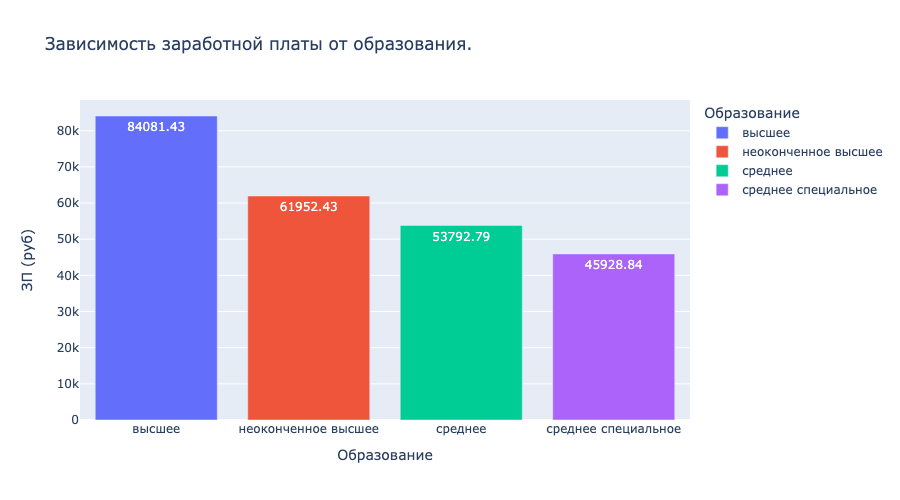

Высшее образование оплачивается лучше всего.. Как и ожидалось.)) Учитесь дети лучше. Не будьте мной.)


In [19]:
# Сгруппирую данные по столбцу образование и посчитаю медиану.
bar_data_s3_p4 = hh_data.groupby(by='Образование', as_index=False)[['ЗП (руб)']].mean().round(2)

# Взял график из юнита про визуализацию plotly. Даже подписи к каждой строке оставлю.))
fig_s3_p4 = px.bar(data_frame=bar_data_s3_p4, # Датафрейм. 
                   x='Образование', # Ось x.
                   y='ЗП (руб)', # Ось y.
                   color='Образование', # Расцветка в зависимости от образования.
                   text = 'ЗП (руб)', # Текст на столбцах.
                   orientation='v', # Ориентация графика.
                   height=500, # Высота.
                   width=900, # Ширина.
                   title='Зависимость заработной платы от образования.') # Заголовок.

# Чтоб белым текст везде был. И на столбцах, и при наведении.
fig_s3_p4.update_traces(textfont=dict(color='white'), hoverlabel=dict(font=dict(color='white')))

# Отображаем его.
#fig_s3_p4.show()
fig_s3_p4.show('png')

print(f"{bar_data_s3_p4.iloc[0][0].capitalize()} образование оплачивается лучше всего.. Как и ожидалось.)) Учитесь дети лучше. Не будьте мной.)")

Так. Я заранее прошу прощения, что отклонился от задания и вывел среднюю зарплату по столбцу, а не медианную, как требовалось в задании. Потому что медианная - слева направо: 60, 50, 40, 40.. Имхо скучно. Так же прошу прощения, что я не сделал "меньше ляма", т.к. цифры практичеки не отличаются. В медианном случае вообще. Я сделал "меньше ляма" в пункте 3 и строил там диаграммы исходя из копии. Можете в пункте 4 прописать копию из пункта 3 и увидите, что там на условно копейки меняются цифры. 

И вопросы:

Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?

> Собсно поэтому я и сделал график по значениям .mean(), а не .median(), чтобы написать: наибольший уровень зп наблюдается если образование - высшее, а наименьший - если среднее специальное.)) ы


Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

> Не мне судить о важности уровня образования.)) У меня у самого неоконченное высшее.)) Я вон на 60 тыщ в среднем претендую.))) Тут скорее важен факт наличия у человека умения учиться и стремления к самосовершенствованию. Еще могу написать множество определений качеств, обладание которыми будет гораздо лучше, чем регалия об окончании чего-то. Но к сожалению людям важны регалии.. А в целом, если институт хороший и образование в нём качественное, человек, обладающий нужными качествами + закончивший этот ВУЗ, будет более компетентным в любой сфере. Такое моё мнение.

[↑ contents](#contents)

<h3 id='saltowndeps'>Диаграмма зависимости признаков "Заработная плата" и "Город"</h3>

Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.

Сделайте выводы по полученной диаграмме: 

- Как соотносятся медианные уровни желаемой заработной платы и их размах в городах? 
- Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

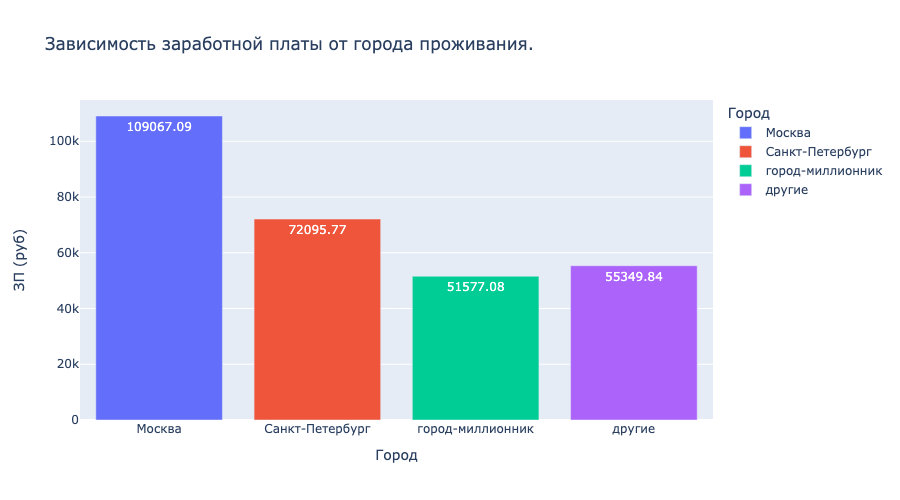

In [20]:
# Сгруппирую данные по столбцу образование и посчитаю медиану.
bar_data_s3_p5 = hh_data.groupby(by='Город', as_index=False)[['ЗП (руб)']].mean().round(2)

# Взял график из юнита про визуализацию plotly. Даже подписи к каждой строке оставлю.))
fig_s3_p5 = px.bar(data_frame=bar_data_s3_p5, # Датафрейм. 
                   x='Город', # Ось x.
                   y='ЗП (руб)', # Ось y.
                   color='Город', # Расцветка в зависимости от образования.
                   text = 'ЗП (руб)', # Текст на столбцах.
                   orientation='v', # Ориентация графика.
                   height=500, # Высота.
                   width=900, # Ширина.
                   title='Зависимость заработной платы от города проживания.') # Заголовок.

# Чтоб белым текст везде был. И на столбцах, и при наведении.
fig_s3_p5.update_traces(textfont=dict(color='white'), hoverlabel=dict(font=dict(color='white')))

# Отображаем его.
#fig_s3_p5.show()
fig_s3_p5.show('png')

По ходу я буду извиняться в каждом задании.))
Снова: 1. Не стал делать по данным, в которых "ЗП < 1e+6", т.к. там цифры не особо отличаются и график не искажается. И 2. Не стал делать .median(), т.к. там скучно: 85 60 40 40. А с .mean() цифры интереснее. Да, я прекрасно понимаю, что это характеризует мою "непослушность", но давайте посмотрим правде в лицо, я сейчас нахожусь на обучении, а не на работе. Надеюсь на понимание.

И 2 вопроса:

Как соотносятся медианные уровни желаемой заработной платы и их размах в городах? 

> Тут сложно ошибиться, потому что наша страна - это центр и регионы. В центре зарплаты будут выше, а в регионах - ниже. Потому 85 медиана в Москве, 60 в Питере, а остальное по 40.  

Как вы считаете, важен ли признак города при прогнозировании заработной платы?

>  В нашей стране - да. Хотя, если ты толковый IT специалист, ты можешь работать где угодно откуда угодно.

[↑ contents](#contents)

<h3 id='salreadinesstodeps'>Диаграмма зависимости признаков "Заработная плата", "Готовность к переезду" и "Готовность к командировкам"</h3>

Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. 

Проанализируйте график, сравнив уровень заработной платы в категориях.

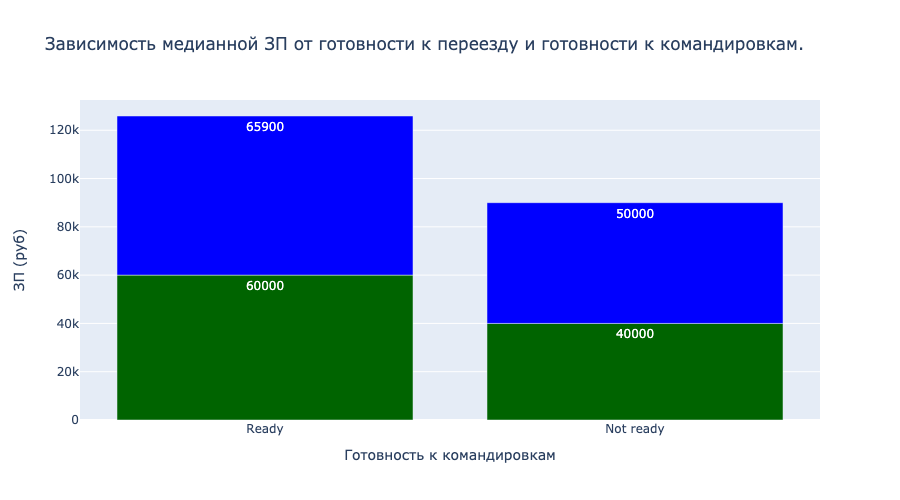

Желаемая округлённая медианная зарплата соискателей, готовых и к переезду, и к командировкам = 66 тыс. руб.


In [21]:
# Вычислю медианные значения зарплаты для разных комбинаций признаков, отсортирую по командировкам, чтобы было красивее.
median_salary_df_s3_p6 = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index().sort_values(by='Готовность к командировкам', ascending=False)

# Здесь я переименовал булевые имена на более приятные, потому что задолбался искать, как поменять названия, 
# которые появляются при наведении на график. Параметр 'color='.
median_salary_df_s3_p6['Готовность к переезду'] = ['Ready' if i else 'Not ready' for i in median_salary_df_s3_p6['Готовность к переезду']]

# Построю многоуровневую столбчатую диаграмму.
fig_s3_p6 = px.bar(median_salary_df_s3_p6,
                   x='Готовность к командировкам',
                   y='ЗП (руб)',
                   color='Готовность к переезду',
                   title='Зависимость медианной ЗП от готовности к переезду и готовности к командировкам.',
                   text='ЗП (руб)',
                   color_discrete_map={'Ready': 'blue', 'Not ready': 'darkgreen'},
                   height=500,
                   width=900)

# Уберу легенду, т.к. не информативная.
fig_s3_p6.update_traces(showlegend=False,
                        texttemplate='%{text:.0f}',
                        textposition='inside',
                        textfont=dict(color='white'))

# Изменяем подписи по оси X
fig_s3_p6.update_xaxes(tickvals=[True, False], ticktext=['Ready', 'Not ready'])


# Отображаем.
#fig_s3_p6.show()
fig_s3_p6.show('png')

print(f"Желаемая округлённая медианная зарплата соискателей, готовых и к переезду, и к командировкам = {int((median_salary_df_s3_p6.loc[median_salary_df_s3_p6['Готовность к командировкам'] & (median_salary_df_s3_p6['Готовность к переезду'] == 'Ready'), 'ЗП (руб)']/1000).round().values[0])} тыс. руб.")

Итак. в этот раз мне извиняться не за что. Мне не нужно было делать датафрейм с данными, где ЗП < 1e+6. Так же я сделал медиану, т.к. в юните нужно было указать именно медиану. Ну, медиану, так медиану.)) Убедили.))
Так же, я учёл цветовую схему из первых трёх графиков. В 4 и 5 было больше столбцов, но там тоже есть синий и зелёный.))

И беглый анализ:

Я специально вывел по оси Х готовность к командировкам, потому что наблюдается тенденция, в которой люди, готовые к командировкам, хотят больше бабок.) Это хорошо можно наблюдать в левом нижнем и правом верхнем прямоугольниках. Слева внизу к переезду не готовы, но готовы к командировкам и 60к, а справа сверху наоборот и 50к. Ну и люди, которые ни к чему не готовы хотят меньше всего денег. 
И на самом деле - это всё странно. Потому что готовые к переезду люди должны хотеть больше денег, если взять IT сферу. В европе минимум зп - это 1200 евро. х100 = 120к руб. Да, цены в европе выше, на 1200 ты еле концы с концами сводить будешь, если съёмная хата ~500/600 евро и это считай студия квадратов на 20, и типа 600 евро на поесть/попить, что тоже охренеешь, т.к. десяток яиц тут = 5 евро. 5 евро, Карл! 12 яиц!)) (Описываю Антиб, не придирайтесь). Но окей, платить будут в среднем от 2к евро, что, в целом, терпимо. Официанты на пляже по 2к имеют, а тут - программист!) Короче готовые к переезду люди должны хотеть больше бабла.)

[↑ contents](#contents)

<h3 id='salageedudeps'>Тепловая карта зависимости признаков "Заработная плата", "Возраст" и "Образование"</h3>

Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. 

Проанализируйте тепловую карту, сравнив показатели внутри групп.

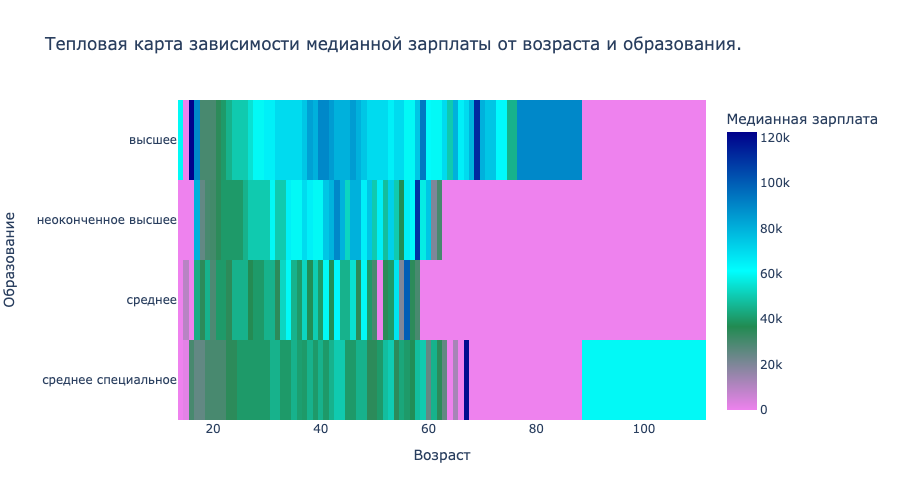

In [22]:
pivot_s3_p7 = hh_data.pivot_table(values='ЗП (руб)',
                                  index='Образование',
                                  columns='Возраст',
                                  aggfunc='median',
                                  fill_value=0)

fig_s3_p7 = px.imshow(pivot_s3_p7,
                      labels=dict(color='Медианная зарплата'),
                      title='Тепловая карта зависимости медианной зарплаты от возраста и образования.',
                      color_continuous_scale=[[0, 'violet'], [0.3, '#228b52'], [0.5, 'cyan'], [1, 'darkblue']], 
                      width=900, height=500)

#fig_s3_p7.show()
fig_s3_p7.show('png')

Снова сорян за такой выбор палитры. Хотел уложиться в свой цветовой диапазон синего и зелёного, но... Сначала я поставил на 0 чёрный цвет и думал закончить, но потом я ради прикола написал violet и.. Батюшки, да это ж хромакей!))) Ну и оставил. Не судите строго.) Зато хорошо видно оттенки, типа 15-ти летнего чувака с средним специальным образованием, который запросил 2к руб/мес.))) А так, всё прекрасно видно что к чему.)

Итак, беглый анализ. 

Столетнего деда пропустим, о нём я уже фантазировал. (xDD)  
Обращу внимание лучше на малолеток-вундеркиндов, у которых уже есть вышка и они хотят 60, 122, 90 к/мес. Сплошные Алисы Тепляковы в таблице.)) Ладно ещё со средним образованием челик в 15 лет 10к захотел, но эти.. 17 лет 80к неоконченное высшее.)) Найс.) Самооценка - топ.)  
Я думаю высшее у нас начинается.. Ну ладно с 20 лет, если челик закончил школу в 16 и времени зря не терял, прошёл институтский курс за 4 года, вместо 5. И получил диплом. Но это скорее крайне редкое исключение.  
Далее.  
Неоконченное высшее окей, может начинаться хоть с 1 курса инста, потому 18-19 лет вполне.  
Среднее и среднее специальное, окей, 16-18 лет вполне.  
Теперь к дедам.  
Пенсионный возраст на данный момент, женщины - 60 лет, мужчины - 65 лет. Я не знаю, как работает хедхантер и могут ли официально работать люди, вышедшие на пенсию, но.. почему нет? Силы есть? Способности есть? В основном ажиотаж поработать на пенсии наблюдается у людей с высшим образованием. К тому же, на минуточку, нашему Владимиру - 70 и он ещё восседает.) И ничего.) А вот со средним специальным в 67 лет, да ещё и 120к.. - сомнительно.  
Более не имею знаний и опыта для анализа зарплат людей 25-50 лет, ибо никогда подобным не занимался.

Забавно, кстати. Пункт 7 - самый мой короткий код и самая длинная юмористическая аналитика.)  

(Не судите строго, это мой первый проект в аналитике. Все речевые обороты и фразеологизмы оставлю оригинальными, чтобы под конец жизни поностальгировать над тем, какой я был балбес.)

[↑ contents](#contents)

<h3 id='agestagedeps'>Диаграмма рассеяния зависимости признаков "Опыт работы" и "Возраст"</h3>

Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

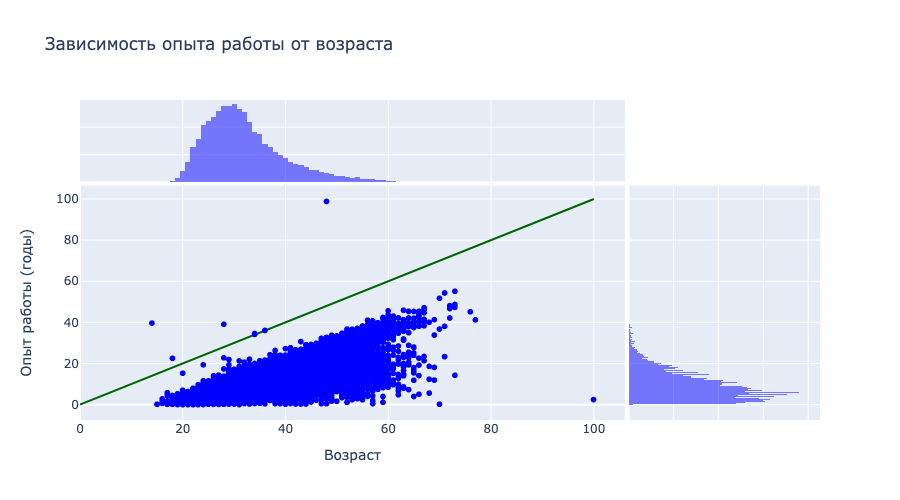

Выше построенной прямой лежит: 7 точек.


In [23]:
# Сделаю через копию.
hh_data_copy_s3_p8 = hh_data.copy()

# Переведу в годы, округлю до 2 цифр после запятой.
hh_data_copy_s3_p8['Опыт работы (годы)'] = (hh_data_copy_s3_p8['Опыт работы (месяц)'] / 12).round(2)

# Не знаю зачем эта строчка... Потому что могу.
hh_data_copy_s3_p8 = hh_data_copy_s3_p8[['Опыт работы (годы)', 'Возраст']]

# Диаграмма рассейния.
fig_s3_p8 = px.scatter(hh_data_copy_s3_p8,
                       x='Возраст',
                       y='Опыт работы (годы)',
                       marginal_x='histogram',
                       marginal_y='histogram',
                       title='Зависимость опыта работы от возраста',
                       color_discrete_sequence=['blue'], # Цвет точек.
                       width=900, height=500) 

# Добавлю линию.
fig_s3_p8.add_scatter(x=[0, 100],
                      y=[0, 100],
                      mode='lines',
                      line=dict(color='darkgreen'))

# Уберу легенду, она тут имхо лишняя.
fig_s3_p8.update_traces(showlegend=False)

#fig_s3_p8.show()
fig_s3_p8.show('png')

print(f"Выше построенной прямой лежит: {hh_data_copy_s3_p8[hh_data_copy_s3_p8['Опыт работы (годы)'] > hh_data_copy_s3_p8['Возраст']].count()[0]} точек.")

Ну что я могу сказать.. Чем ближе точки находятся к линии, тем бредовей цифры. Возраст 25, стаж - 11.5 лет. Человек работает с 13. Возраст 29, стаж 22. В школу не пошёл, на работу пошёл.) 47-32.. 43-31.. 31-21.. 28-23.. 24-19.. с пелёнок работает.))) И вообще этот график напоминает игру [Particle Fleet: Emergence](https://store.steampowered.com/app/422900/Particle_Fleet_Emergence/), там есть корабль, который так же шарики выпускает.)))

[↑ contents](#contents)

<h3 id='additionalone'>Диаграмма о готовности человека к чему-либо</h3>

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".

Построю столбчатую диаграмму, характеризующую готовность человека к чему-то. Обычный value_counts по столбцам.

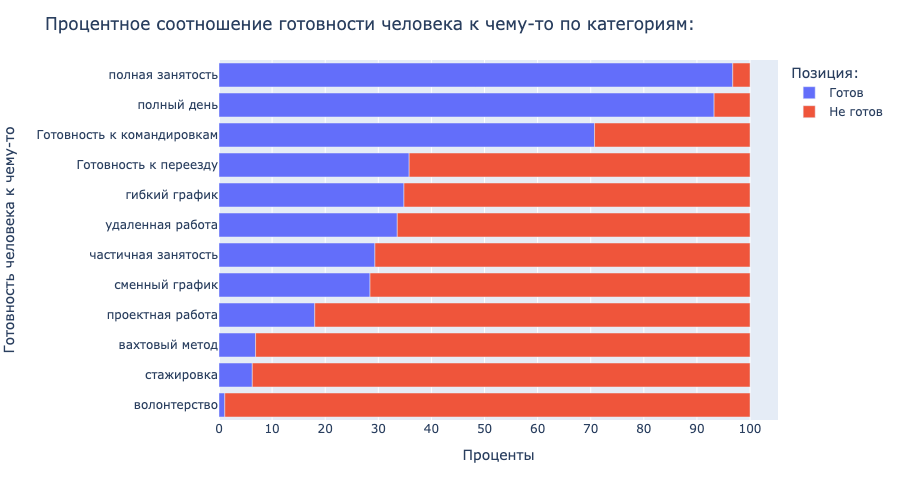

In [24]:
# Выберу необходимые признаки, которые мы создавали в разделе "Преобразование данных".
hh_data_copy_s3_p9_v_1 = hh_data[['Готовность к переезду', 'Готовность к командировкам', 'удаленная работа',
                                  'вахтовый метод', 'сменный график', 'гибкий график',
                                  'полный день', 'полная занятость', 'частичная занятость',
                                  'проектная работа', 'стажировка', 'волонтерство']]

# Создаю новый датафрейм с помощью melt() и value_counts().
result_df_s3_p9 = pd.melt(hh_data_copy_s3_p9_v_1).value_counts().unstack(fill_value=0)

# Переименую столбцы для красоты, поменяю столбцы местами и задам название для главного индекса.
result_df_s3_p9.columns = ['Не готов', 'Готов']
result_df_s3_p9 = result_df_s3_p9[['Готов', 'Не готов']]
result_df_s3_p9.index.name = 'Готовность человека к чему-то'

# Тот же датафрейм, только в процентном соотношении. Кстати странно, что если написать normalize=True в value_counts 
# несколькими строками выше - не срабатывает, как надо. И пришлось вычислять процент через .div().
result_df_s3_p9_percent = (result_df_s3_p9.div(result_df_s3_p9.sum(axis=1), axis=0) * 100).sort_values('Готов').round(2)

# Создаю горизонтальную столбчатую диаграмму.
fig_s3_p9_v1 = px.bar(result_df_s3_p9_percent, orientation='h', barmode='relative', width=900, height=500)

# Настраиваю метки и названия осей.
fig_s3_p9_v1.update_xaxes(title_text='Проценты', tickvals=np.arange(0, 101, 10))
fig_s3_p9_v1.update_yaxes(title_text='Готовность человека к чему-то')

# Настраиваю заголовок и легенду.
fig_s3_p9_v1.update_layout(title='Процентное соотношение готовности человека к чему-то по категориям:',
                           legend_title_text='Позиция:')

# Меняю отображение информации при наведении мышью. Текст и цвет.
fig_s3_p9_v1.update_traces(hovertemplate='%{y}<br>%{x:.2f}%',
                           hoverlabel=dict(font=dict(color='white')))

# Отображаю график.
#fig_s3_p9_v1.show()
fig_s3_p9_v1.show('png')

На самом деле для меня пока сложна вот эта вот свободная инициатива, мол: "постройте ещё пару графиков про влияние/взаимосвязь/распределение". И я теряюсь в бесконечном залипании на hh_data.columns. А пару баллов охота, хз зачем..))) Ну и выбор мой пал на то, что нравится больше всего, на value_counts, что привело меня вот к такой диаграмме. Да, здесь просто подсчёт тру фолсов по столбцам. Без взаимосвязи друг с другом. И что я могу сказать, глядя на него? Что большинство хочет полную занятость с 9 до 6. Хотят люди командировок и не хотят никуда уезжать. Переезд+гибкий график+удалёнка - примерно по 35%. Частичная+сменный - треть. Вахтовать и стажироваться мало кто хочет. Ну и волонтёрить не хочет практически никто.)

[↑ contents](#contents)

<h3 id='additionaltwo'>Диаграмма ожидаемой заработной платы по должностям</h3>

Подошёл к жене, показал ей столбцы своей таблицы и спросил: соотношение какого столбца к какому ты хочешь увидеть? Получил ответ: должность к зарплате. Т.е. сколько в среднем хочет тот или иной специалист. Ну и да пожалуйста.))

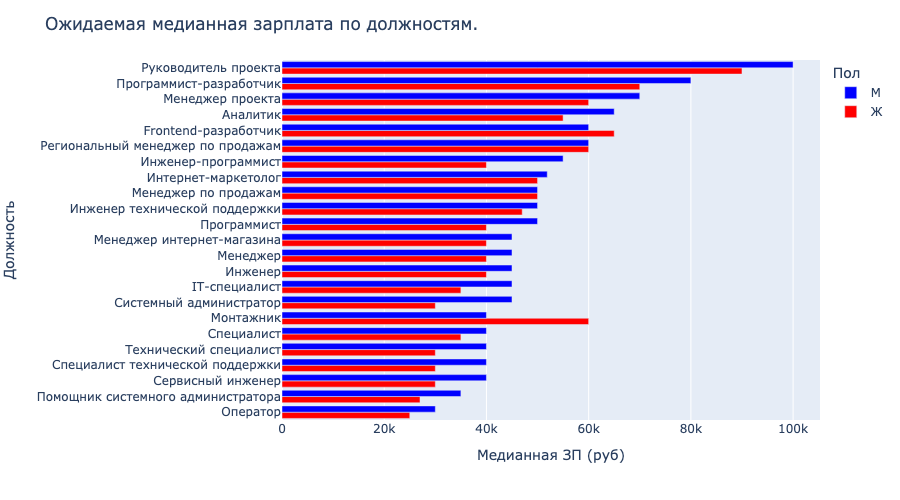

In [25]:
# Создам отдельную копию.
work_position_change = hh_data.copy()

# Тут я попытался преобразовать столбец с должностями через словарь, т.к. там сборная солянка всего подряд.
# Кроме как через словарь, я не додумался как это можно сделать. И раз задания преобразовывать этот столбец не было,
# Я прошёлся только по специалистам ИТ.))) Там жесть вообще.) 
# А всё затевалось ради окончаний "менеджеров и руководителей проектОВ", потому что они больше всех бабок хотят.)
# И дублировались на диаграмме.
synonym_dict = {'специалист отдела ИТ': 'IT-специалист',
                'Специалист по IT': 'IT-специалист',
                'ИТ-специалист': 'IT-специалист',
                'Специалист IT отдела': 'IT-специалист',
                'Специалист ИТ': 'IT-специалист',
                'Специалист по ИТ': 'IT-специалист',
                'IT специалист': 'IT-специалист',
                'Специалист IT': 'IT-специалист',
                'It специалист': 'IT-специалист',
                'IT Специалист': 'IT-специалист',
                'It-специалист': 'IT-специалист',
                'Начинающий специалист IT': 'IT-специалист',
                'IT-специалист отдела': 'IT-специалист',
                'Специалист по it': 'IT-специалист',
                'IT-специалист-отдела': 'IT-специалист',
                'IT-специалист Специалист': 'IT-специалист',
                'IT-специалист-специалист': 'IT-специалист',
                'ИТ': 'IT-специалист',
                'IT': 'IT-специалист',
                'ПК': 'IT-специалист',
                'специалист по IT': 'IT-специалист',
                'IT-специалиста': 'IT-специалист',
                'IT specialist': 'IT-специалист',
                'it специалист': 'IT-специалист',
                'IT-специалист специалист': 'IT-специалист',
                'IT Specialist': 'IT-специалист',
                'Спеиалист it': 'IT-специалист',
                'Работник it отдела': 'IT-специалист',
                'Сотрудник it-отдела (совмещённая/удалённая работа).': 'IT-специалист',
                'it': 'IT-специалист',
                'Cпециалист в IT-сфере': 'IT-специалист',
                'IT-specialist': 'IT-специалист',
                'IT-Специалист': 'IT-специалист',
                'Специалист IT-отдела': 'IT-специалист',
                'it-specialist': 'IT-специалист',
                'Начинающий it специалист': 'IT-специалист',
                'Начинающий специалист в it-сфере': 'IT-специалист',
                'IT - специалист': 'IT-специалист',
                'Специалист информационных технологий': 'IT-специалист',
                'Специалист отдела IT': 'IT-специалист',
                'Менеджер проектов': 'Менеджер проекта',
                'Руководитель проектов': 'Руководитель проекта'}

# Тут применение словаря. Без регекса.
work_position_change['Ищет работу на должность:'] = work_position_change['Ищет работу на должность:'].replace(synonym_dict)

# Тут я создал маску должностей, в которой по v-c >200, а то там 14 тыщ должностей. ValueCounts - рулит!)
value_counts_mask = work_position_change['Ищет работу на должность:'].map(work_position_change['Ищет работу на должность:'].value_counts()) > 200

# Сделал дф с применённой маской.
hh_data_copy_s3_p9_v_2 =  work_position_change.loc[value_counts_mask, :].reset_index(drop=True)

# Сгруппировал по должности, полу и зряплате.)) Применил .median, unstack-нул, чтоб были столбцы и отсортировал.
company_position_vs_salary = hh_data_copy_s3_p9_v_2.groupby(by=['Ищет работу на должность:', 'Пол'])['ЗП (руб)'].median().unstack(fill_value=0).sort_values(by=['М', 'Ж'], ascending=[True, True])

# Ну и фигура, с бармодом=груп.
fig_s3_p9_v2 = px.bar(company_position_vs_salary,
                      orientation='h',
                      width=900,
                      height=500,
                      barmode='group',
                      color_discrete_map={'М': 'blue', 'Ж': 'red'})

# Метки осей, заголовок, легенда, поменял позицию отображение значков легенды.
fig_s3_p9_v2.update_layout(xaxis_title='Медианная ЗП (руб)',
                           yaxis_title='Должность',
                           title='Ожидаемая медианная зарплата по должностям.',
                           legend=dict(title='Пол', traceorder='reversed'))

# Изменение цвета и текста при наведении мышью.
fig_s3_p9_v2.update_traces(hovertemplate='%{y}<br>%{x:.0f} руб',
                           hoverlabel=dict(font=dict(color='white')))

# И фигшоу.)
#fig_s3_p9_v2.show()
fig_s3_p9_v2.show('png')

МОНТАЖНИК!!!!) А так в целом типичное. Мужики получают больше, чем женщины на одних и тех же должностях. Кому интересно, можно поменять значение в маске valuecounts и поставить height побольше, чтобы увидеть больше профессий. А если преобразовать столбец с должностями - вообще можно конфетку сделать.. Но там мрак.) Я хз, как это можно преобразовать.)

# Очистка данных

[↑ contents](#contents)

<h3 id='dublicsvsnans'>Удаление дублей и работа с пропусками</h3>

Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [26]:
if hh_data.duplicated().sum() > 0:
    hh_data_duplicates_s4_p1 = hh_data.duplicated().sum()

hh_data = hh_data.drop_duplicates().reset_index(drop=True)
print(f"Количество полных дубликатов в таблице = {hh_data_duplicates_s4_p1} шт.")

Количество полных дубликатов в таблице = 161 шт.


Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [27]:
# Можно я не буду отдельную переменную создавать для принта? 
print(f"Следующие столбцы имеют соответствующие пропуски:\n{hh_data.isna().sum()[hh_data.isna().sum() > 0]}")

Следующие столбцы имеют соответствующие пропуски:
Опыт работы (месяц)                168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64


Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [28]:
for i in hh_data.columns:
    if hh_data[i].isna().sum() < 3:
        hh_data = hh_data.dropna(subset=[i])
    else:
        hh_data[i] = hh_data[i].fillna(hh_data[i].median())
print(f"Результирующее среднее значение в столбце «Опыт работы (месяц)» = {int(hh_data['Опыт работы (месяц)'].mean().round())} мес.")

Результирующее среднее значение в столбце «Опыт работы (месяц)» = 114 мес.


[↑ contents](#contents)

<h3 id='outliersbyhands'>Удаление выбросов вручную</h3>

Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [29]:
# По старинке, добавлю условие для ревоспроизведения ячейки.
if (hh_data['ЗП (руб)'] > 1e+6).value_counts().shape[0] > 1:
    
    # Здесь список индексов строк, удовлетворяющих условия задачи.
    outliers_s4_p4 = hh_data.loc[(hh_data['ЗП (руб)'] > 1e+6) | (hh_data['ЗП (руб)'] < 1e+3), 'ЗП (руб)'].index
    
    # Ну и дропчанский. Хз, не люблю inplace=True.
    hh_data = hh_data.drop(outliers_s4_p4, axis=0).reset_index(drop=True)
print(f"Количество выбросов, согласно поставленной задаче пункта 4 = {len(outliers_s4_p4)} шт.")

Количество выбросов, согласно поставленной задаче пункта 4 = 89 шт.


В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [30]:
# Тут всё то же самое, только условия другие.
if len(hh_data[hh_data['Опыт работы (месяц)'] / 12 > hh_data['Возраст']].index) > 0:
    
    # Список индексов строк.
    outliers_s4_p5 = hh_data[hh_data['Опыт работы (месяц)'] / 12 > hh_data['Возраст']].index
    
    # Дроп.
    hh_data = hh_data.drop(outliers_s4_p5, axis=0).reset_index(drop=True)
print(f"Количество выбросов, согласно поставленной задаче пункта 5 = {len(outliers_s4_p5)} шт.")

Количество выбросов, согласно поставленной задаче пункта 5 = 7 шт.


[↑ contents](#contents)

<h3 id='outlierszdeviation'>Удаление выбросов по методу Z-отклонений</h3>

В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид: <br><br> `histplot.axvline(log_age.mean(), color='k', lw=2)` <br><br> В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику. Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**. <br><br> Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [31]:
# Функция определения выбросов по методу z-отклонений.
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    
    if log_scale:
        x = np.log(data[feature]) # +1 не стал делать, т.к. нулевых значений в целевом столбце нет.
    else:
        x = data[feature]

    mu = x.mean()
    sigma = x.std()
    
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    
    return outliers, cleaned

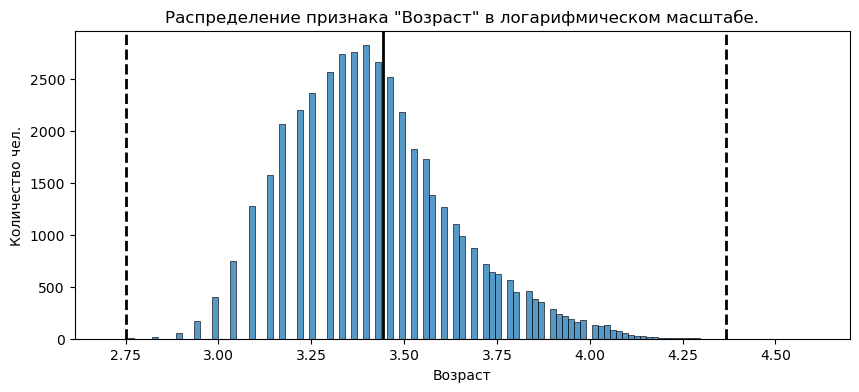

Под категорию выбросов попадают соискатели с возрастом: 100 и 15 возрастных единиц.


In [34]:
# Применение функции.
outliers_s4_p6, cleaned_s4_p6 = outliers_z_score_mod(data=hh_data,
                                                     feature='Возраст',
                                                     log_scale=True,
                                                     right=4)

# Стройка графика с подписями. Не буду здесь расписывать. Всё, как в юните.
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

cleaned_nplog = np.log(cleaned_s4_p6['Возраст'])

histplot_s4_p6 = sns.histplot(data=np.log(hh_data['Возраст']), ax=axes)

histplot_s4_p6.axvline(cleaned_nplog.mean(), lw=2, color='k')
histplot_s4_p6.axvline(cleaned_nplog.mean() - 3 * cleaned_nplog.std(), ls='--', lw=2, color='k')
histplot_s4_p6.axvline(cleaned_nplog.mean() + 4 * cleaned_nplog.std(), ls='--', lw=2, color='k')

histplot_s4_p6.set_title('Распределение признака "Возраст" в логарифмическом масштабе.')
histplot_s4_p6.set_ylabel('Количество чел.')

plt.show('png');

print(f"Под категорию выбросов попадают соискатели с возрастом: {' и '.join(map(str, set(outliers_s4_p6['Возраст'])))} возрастных единиц.")

Мода находится левее середины или середина находится правее моды. Это означает, что на лицо правосторонняя асимметрия. Я указал для пунктирных границ константы из задания, потому на графике всё везде влезает!)

[↑ contents](#contents)